After reading a [great blog post by Randy Olson](http://www.randalolson.com/2014/10/29/the-reigns-and-deaths-of-the-roman-emperors/) on roman emperors, I decided to revisit the data found in this [Wikipedia page](https://en.wikipedia.org/wiki/List_of_Roman_emperors). This will allow us to do a little bit of HTML parsing using beautiful soup as well as a little data visualization. My main focus will be to reproduce Randy's plot and then draw another type of plot using the same data to gain additional insight.

First, let's get the data!

# Getting the data

To grab the data in the table, we first need to download the Wikipedia webpage:

In [1]:
import requests

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_Roman_emperors')
r

<Response [200]>

A 200 response means we were able to download the webpage without any hiccups. Let's now parse the HTML data using beautiful soup:

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

The soup contains the table data, which we now need to extract by tags. We're trying to find the elements in the table hierarchy that goes like this:

>table tr td 

We can use the `select` function [defined in the BS4 documentation](http://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors) to do that:

In [4]:
items = soup.select('table tr td')

How many items do we have?

In [5]:
len(items)

994

Let's look at a single item:

In [6]:
items[6]

<td>40 years, 7 months and 3 days</td>

The next item we want is 7 items later, because there are 7 columns in the table of the webpage.

In [7]:
items[6 + 7]

<td>22 years, 5 months and 27 days</td>

All we now need to do is to filter these accordingly (take every 7th, to jump from row to row):

In [8]:
dates = [items[i] for i in range(len(items)) if (i + 1) % 7 == 0]

We take only the first 86 emperors in the table (before the fall of Rome).

In [9]:
dates = dates[:86]

Let's preview them:

In [10]:
dates[:10]

[<td>40 years, 7 months and 3 days</td>,
 <td>22 years, 5 months and 27 days</td>,
 <td>3 years, 10 months and 6 days</td>,
 <td>13 years, 8 months and 18/19 days</td>,
 <td>13 years, 7 months and 27 days</td>,
 <td>7 months and 7 days</td>,
 <td>3 months and 1 day (91 days)</td>,
 <td>8 months and 3 days</td>,
 <td>9 years, 6 months and 3 days</td>,
 <td>2 years, 2 months and 20 days</td>]

And let's extract the text:

In [11]:
dates = [items.text for items in dates]

In [12]:
dates[:10]

['40 years, 7 months and 3 days',
 '22 years, 5 months and 27 days',
 '3 years, 10 months and 6 days',
 '13 years, 8 months and 18/19 days',
 '13 years, 7 months and 27 days',
 '7 months and 7 days',
 '3 months and 1 day (91 days)',
 '8 months and 3 days',
 '9 years, 6 months and 3 days',
 '2 years, 2 months and 20 days']

In the same way, we can extract the emperor names:

In [13]:
names = [items[i] for i in range(len(items)) if (i + 6) % 7 == 0]

In [14]:
names = names[:86]

Let's preview that also:

In [15]:
names[:10]

[<td><b><a href="/wiki/Augustus" title="Augustus">Augustus</a></b><br/>
 <small>IMPERATOR CAESAR DIVI FILIVS <b>AVGVSTVS</b></small></td>,
 <td><b><a href="/wiki/Tiberius" title="Tiberius">Tiberius</a></b><br/>
 <small><b>TIBERIVS</b> IVLIVS CAESAR AVGVSTVS</small></td>,
 <td><b><a href="/wiki/Caligula" title="Caligula">Caligula</a></b><br/>
 <small><b>GAIVS</b> IVLIVS CAESAR AVGVSTVS GERMANICVS</small></td>,
 <td><b><a href="/wiki/Claudius" title="Claudius">Claudius</a></b><br/>
 <small>TIBERIVS <b>CLAVDIVS</b> CAESAR AVGVSTVS GERMANICVS</small></td>,
 <td><b><a href="/wiki/Nero" title="Nero">Nero</a></b><br/>
 <small><b>NERO</b> CLAVDIVS CAESAR AVGVSTVS GERMANICVS</small></td>,
 <td><b><a href="/wiki/Galba" title="Galba">Galba</a></b><br/>
 <small>SERVIVS SVLPICIVS <b>GALBA</b> CAESAR AVGVSTVS</small></td>,
 <td><b><a href="/wiki/Otho" title="Otho">Otho</a></b><br/>
 <small>MARCVS SALVIVS <b>OTHO</b> CAESAR AVGVSTVS</small></td>,
 <td><b><a href="/wiki/Vitellius" title="Vitellius">Vi

We still need to extract the right names from the HTML:

In [16]:
names = [name.find('a').text for name in names]

In [17]:
names[:10]

['Augustus',
 'Tiberius',
 'Caligula',
 'Claudius',
 'Nero',
 'Galba',
 'Otho',
 'Vitellius',
 'Vespasian',
 'Titus']

The core of our work is done. Let's now move on to the visualization part.

# Visualizing the data 

The first thing we will do is to build a table using pandas.

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(data=list(zip(names, dates)), columns=('Emperor name', 'Years in office'))

In [20]:
df.head(12)

,Emperor name,Years in office
0,Augustus,"40 years, 7 months and 3 days"
1,Tiberius,"22 years, 5 months and 27 days"
2,Caligula,"3 years, 10 months and 6 days"
3,Claudius,"13 years, 8 months and 18/19 days"
4,Nero,"13 years, 7 months and 27 days"
5,Galba,7 months and 7 days
6,Otho,3 months and 1 day (91 days)
7,Vitellius,8 months and 3 days
8,Vespasian,"9 years, 6 months and 3 days"
9,Titus,"2 years, 2 months and 20 days"


In [21]:
df.shape

(86, 2)

We need to drop emperors from the dataframe for which there are no data about the years in office:

In [22]:
df = df[~ df['Years in office'].str.contains('Unknown')]

In [23]:
df.shape

(85, 2)

To replicate the plot in Randy Olson's blog, we need to convert the text containing the years in office to a number. We can do so using regular expressions:

- we'll try matching the years
- if that doesn't work, we match months
- if that fails, we match days

In [24]:
import re

In [25]:
p_years = re.compile('(\d+) year[s]?')

In [26]:
p_months = re.compile('(\d+) month[s]?')

In [27]:
p_days = re.compile('(\d+) day[s]?')

We can now build a function that returns a timestamp for every emperor:

In [28]:
def to_timestamp(s):
    m = p_years.search(s)
    if m:
        return pd.Timedelta(value=int(m.groups()[0]) * 365, unit='D')
    else:
        m = p_months.search(s)
        if m:
            return pd.Timedelta(value=int(m.groups()[0]) * 30.5, unit='D')
        else:
            m = p_days.search(s)
            return pd.Timedelta(value=int(m.groups()[0]), unit='D')

In [29]:
df['Reign duration'] = [to_timestamp(s) for s in df['Years in office']]

In [30]:
df.head()

,Emperor name,Years in office,Reign duration
0,Augustus,"40 years, 7 months and 3 days",14600 days
1,Tiberius,"22 years, 5 months and 27 days",8030 days
2,Caligula,"3 years, 10 months and 6 days",1095 days
3,Claudius,"13 years, 8 months and 18/19 days",4745 days
4,Nero,"13 years, 7 months and 27 days",4745 days


Let's now replicate the plot Randall Olson did:

In [31]:
df['Reign duration (years)'] = [duration.days / 365.25 for duration in df['Reign duration']]

In [32]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt

In [34]:
plt.style.use('bmh')

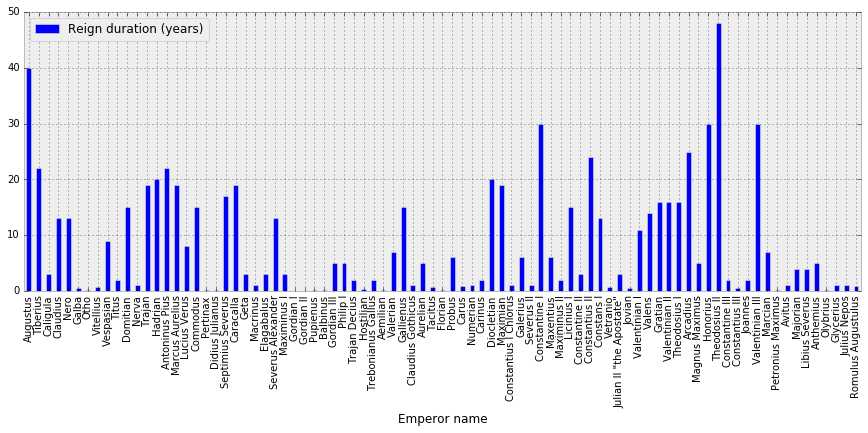

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(kind='bar', ax=ax, x='Emperor name', y='Reign duration (years)')

We can also do other things with the data, for instance plotting the reign distribution histogram of these 85 emperors.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009109DA0>]], dtype=object)

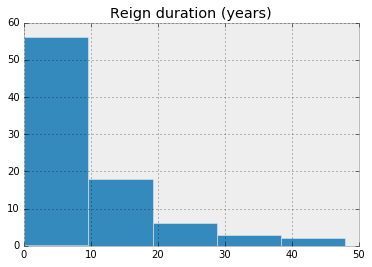

In [36]:
df.hist(column='Reign duration (years)', bins=5)

From this plot, it looks like it was difficult to reign a long time over the Roman empire and that it was a lot more common to have a very short reign.

Another look at this with cumulative distributions gives us this:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A9DC940>]], dtype=object)

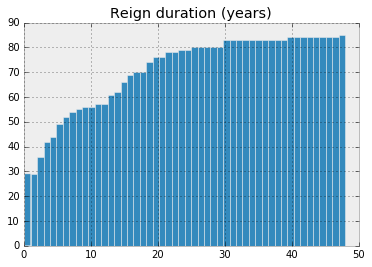

In [37]:
df.hist(column='Reign duration (years)', cumulative='True', bins=50)

The final visualization I would like to offer is the cumulative reigned years of the Roman emperors. This will allow us to identify the periods of turmoil and those of peace.

In [38]:
cumsum = df['Reign duration (years)'].cumsum()

In [39]:
cumsum.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85], dtype=int64)

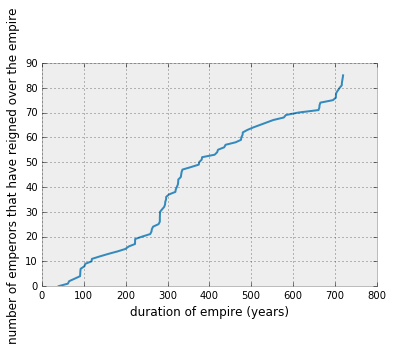

In [40]:
plt.plot(cumsum, cumsum.index.values)
plt.ylabel('number of emperors that have reigned over the empire')
plt.xlabel('duration of empire (years)')

Judging from this curve, it appears that one can distinguish periods of turmoil (steep slope) and peace (horizontal slope). In particular:

- the beginning of the empire and the [Pax Romana](https://en.wikipedia.org/wiki/Pax_Romana) (from Augustus to Marcus Aurelius)
- the crisis around the year 300 ([third century crisis](https://en.wikipedia.org/wiki/Crisis_of_the_Third_Century)) 
- a new stability from 300 to 650 years reigned, also called [the Dominate](https://en.wikipedia.org/wiki/Dominate)
- [fall of the western Roman empire](https://en.wikipedia.org/wiki/Fall_of_the_Western_Roman_Empire)

Let's annotate the previous plot with this information.

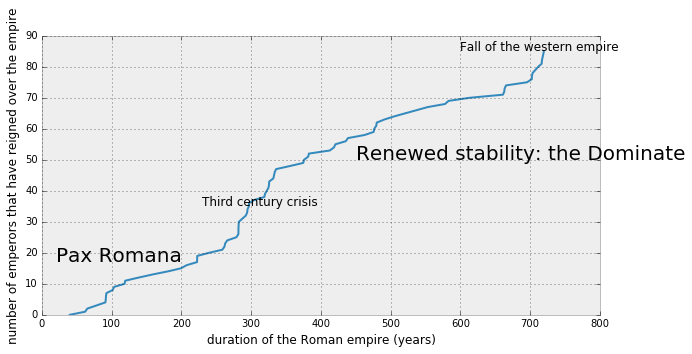

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(cumsum, cumsum.index.values)
plt.ylabel('number of emperors that have reigned over the empire')
plt.xlabel('duration of the Roman empire (years)')
plt.text(20, 17, 'Pax Romana', fontsize=20)
plt.text(230, 35, 'Third century crisis', fontsize=12)
plt.text(450, 50, 'Renewed stability: the Dominate', fontsize=20)
plt.text(600, 85, 'Fall of the western empire', fontsize=12)